In [30]:
import Pkg; Pkg.add("Parameters")
using Plots, Parameters

function params(; A=2.0, s=0.3, α=0.3, δ=0.4, x0=0.25, kmin=0.0, kmax=3.0, N=10_000,
                  g=0.01, )
    kgrid = range(kmin, kmax, length=N)
    t = range(1,100, N)
    return (A=A, s=s, α=α, δ=δ, x0=x0, kmin=kmin, kmax=kmax, kgrid=kgrid, t=t, g=g)
end


function g(p, k)
    @unpack A, s, α, δ = p
    return A * s * k.^α + (1 - δ) * k
end

function kstar(p)
    @unpack s, A, δ, α = p
    return ((s * A) / δ)^(1/(1 - α))
end

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


kstar (generic function with 1 method)

In [31]:
p = params()
kgrid = p.kgrid
g_values = g(p, kgrid)
ks = kstar(p);

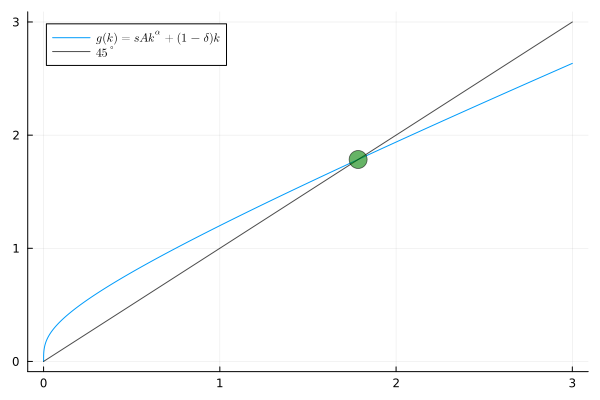

In [32]:
plot(kgrid, g_values, label="\$g(k) = sAk^{\\alpha} + (1 - \\delta)k\$")
plot!(kgrid, kgrid, color=:black, label="\$45^\\circ\$", lw=1, alpha=0.7)
scatter!([ks], [ks], color=:green, label="", ms=10, alpha=0.6)

$$K_{t+1}=(1-\delta)K_t + sF(K_t,A_tL)$$
Using $\frac{A_{t+1}-A_t}{A_t}=g$ and $k_t:=\frac{K_t}{A_tL}$
$$\frac{A_{t+1}}{A_{t+1}} \frac{K_{t+1}}{A_t L} = (1-\delta)\frac{K_t}{A_t L} + s F(\frac{K_t}{A_tL},1)$$
$$(1+g)k_{t+1} = (1-\delta)k_t+sF(k_t,1)$$

# Exercises:
1. Show in a graph (using the format previously shown for functions and parameters), the difference when there is and is not productivity growth.

2. Show how it converges over time to the steady state in each case (with and without productivity growth) for 5 different values of \$k_0$.

# Respuesta:

1. 

In [41]:
using Plots, Parameters

function params(; A=2.0, s=0.3, α=0.3, δ=0.4, x0=0.25, kmin=0.0, kmax=3.0, N=10_000,
                  g=0.01, )
    kgrid = range(kmin, kmax, length=N)
    t = range(1,100, N)
    return (A=A, s=s, α=α, δ=δ, x0=x0, kmin=kmin, kmax=kmax, kgrid=kgrid, t=t, g=g)
end


function g(p, k)
    @unpack A, s, α, δ , g = p
    return (s * k.^α + (1 - δ) * k) / (1+g)
end


function kstar(p)
    @unpack s, A, δ, α, g = p
    return (s / (δ + g))^(1/(1 - α))
end

kstar (generic function with 1 method)

In [42]:
p = params()
kgrid = p.kgrid
g_values = g2(p, kgrid)
ks = kstar2(p);

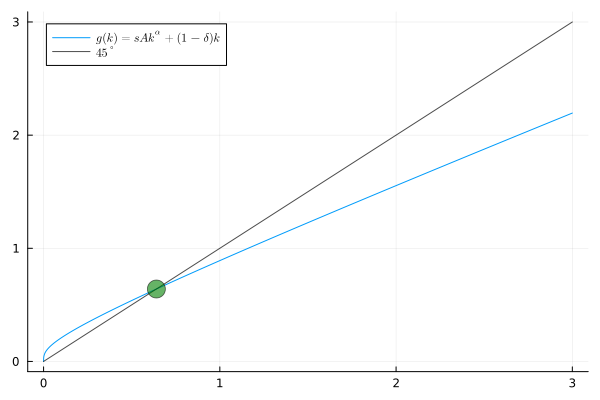

In [44]:
plot(kgrid, g_values, label="\$g(k) = sAk^{\\alpha} + (1 - \\delta)k\$")
plot!(kgrid, kgrid, color=:black, label="\$45^\\circ\$", lw=1, alpha=0.7)
scatter!([ks], [ks], color=:green, label="", ms=10, alpha=0.6)

#plot!(kgrid, g_values, label="\$g2(k) = (sk^{\\alpha} + (1 - \\delta)k)/(1+g)\$")
#scatter!([ks], [ks], color=:green, label="", ms=10, alpha=0.6)